<a href="https://colab.research.google.com/github/Juanjomm2001/Design-of-an-information-network-for-a-pediatric-clinic/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dtuimldmtools

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=75a103a40380d2b399caa80c13a33fdf255741cfba717643579a2b2746d259e5
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import importlib_resources
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler



#upload from drive
df = pd.read_csv(r'/content/drive/MyDrive/air_quality_health_impact_data.csv')

In [ ]:
y = df['HealthImpactScore'] #target

In [ ]:
#Removing Irrelevant Columns
df.drop(columns=['RecordID'],inplace=True)
df.drop(columns=['HealthImpactScore','HealthImpactClass'],inplace=True)

In [ ]:
# Data Normalization
scaler = StandardScaler() # make mean 0, std 1
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
lambdas = np.logspace(-3, 3, 21)  # Values to try for lambda from 1e-3 to 1e3

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

mse_scores = []
for lambda_val in lambdas:
    ridge = Ridge(alpha=lambda_val)  # 'alpha' is the regularization parameter in scikit-learn
    fold_errors = []
    for train_index, test_index in kf.split(df_scaled):
        X_train, X_test = df_scaled.iloc[train_index], df_scaled.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Assuming 'y' is your target variable
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        fold_errors.append(mean_squared_error(y_test, y_pred))
    mse_scores.append(np.mean(fold_errors))  # Average error across folds for this lambda

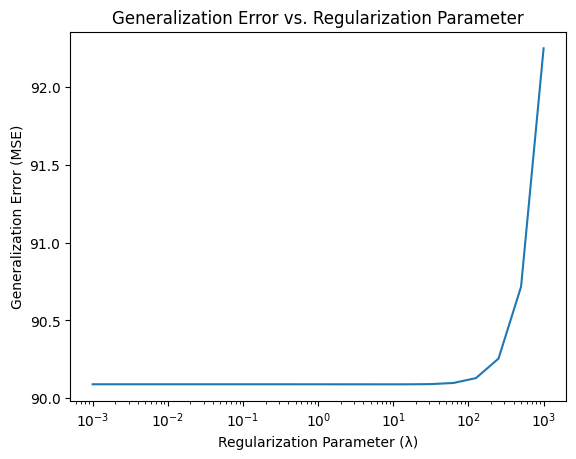

In [ ]:
plt.plot(lambdas, mse_scores)
plt.xscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Generalization Error (MSE)')
plt.title('Generalization Error vs. Regularization Parameter')
plt.show()

In [ ]:
# retrain model on whole dataset
from sklearn.model_selection import train_test_split

# 80:20 train test split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

#'best_lambda' is the optimal lambda value
best_lambda = 0.001

best_ridge = Ridge(alpha=best_lambda)
best_ridge.fit(X_train, y_train)
predicted_y = best_ridge.predict(X_test)  # 'x' is your input data, preprocessed similarly to df_scaled

gen_error = mean_squared_error(y_test, predicted_y)
print(f"Generalization Error (MSE): {gen_error}")

Generalization Error (MSE): 92.68288086683881


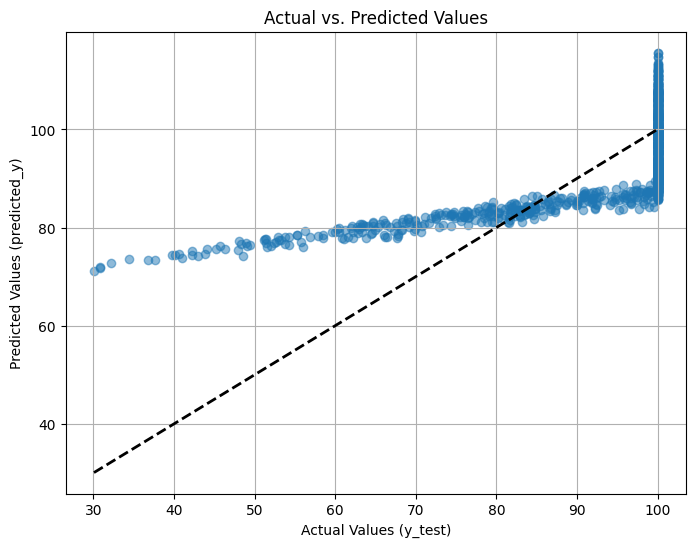

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(y_test, predicted_y, alpha=0.5)  # Alpha for transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (predicted_y)')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
coefficients = best_ridge.coef_
# Create a DataFrame to display coefficients alongside attribute names
coef_df = pd.DataFrame({
    'Attribute': df_scaled.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients for better readability
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the coefficients with attribute names
print(coef_df[['Attribute', 'Coefficient']])

              Attribute  Coefficient
0                   AQI     8.030731
2                 PM2_5     2.814050
1                  PM10     2.251961
5                    O3     2.120844
3                   NO2     1.595578
4                   SO2     0.269686
10  CardiovascularCases    -0.250138
8             WindSpeed    -0.182266
9      RespiratoryCases     0.145078
11   HospitalAdmissions    -0.126693
7              Humidity     0.111204
6           Temperature    -0.035855


In [ ]:
#ANN
# same train-test split as for log regression
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

# Define the model structure n_hidden_units = 5 # number of hidden units in the single hidden layer model = lambda: torch.nn.Sequential( torch.nn.Linear(X.shape[1], n_hidden_units), # X.shape[1] features to H hidden units torch.nn.ReLU(), # 1st transfer function torch.nn.Linear(n_hidden_units, 2), # 2 classes (Assuming binary classification) torch.nn.Softmax(dim=1), # final transfer function, normalization of logit output )

In [ ]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from dtuimldmtools import train_neural_net, visualize_decision_boundary
import pandas as pd
from matplotlib.pyplot import figure, show, title

# Assuming your dataframe is df and has features in 'X' and target in 'y'
# Example:
# df = pd.DataFrame({
#     'X1': [...],
#     'X2': [...],
#     ...,
#     'y': [...]
# })

X = df_scaled
y = y

# Split the data (Use the same train-test split for fair comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#NOW FOR ANN
# Range of hidden units to test
hidden_unit_range = [1,3,5,7]

best_mse = float('inf')  # Initialize with a very large value
best_hidden_units = 0

for n_hidden_units in hidden_unit_range:
  # Define the model structure
  # Changed output layer to 1 unit for regression
  model = lambda: torch.nn.Sequential(
      torch.nn.Linear(X.shape[1], n_hidden_units),  # X.shape[1] features to H hidden units
      torch.nn.ReLU(),  # 1st transfer function
      torch.nn.Linear(n_hidden_units, 1),  # 1 output unit for regression
      # Add a sigmoid activation to constrain output between 0 and 1
      torch.nn.Sigmoid()
  )

  # Changed loss function to MSELoss for regression
  loss_fn = torch.nn.MSELoss()

  # Train the network
  net, _, _ = train_neural_net(
      model,
      loss_fn,
      # Convert X_train and y_train to NumPy arrays before creating tensors
      X=torch.tensor(X_train.values, dtype=torch.float),
      # Normalize target values to be between 0 and 1 for sigmoid
      y=torch.tensor(y_train.values / 100, dtype=torch.float).reshape(-1, 1),
      n_replicates=3,
      max_iter=10000,
  )

  # Determine predictions using trained network
  # Determine predictions using trained network
  # Convert X_test to a NumPy array before creating a tensor
  y_test_est = net(torch.tensor(X_test.values, dtype=torch.float)).data.numpy()
  # Scale predictions back to original range (0-100)
  y_test_est = y_test_est.flatten() * 100

  # Calculate MSE for ANN
  mse_ann = mean_squared_error(y_test, y_test_est)
  # Update best MSE and hidden units if current model is better
  if mse_ann < best_mse:
    best_mse = mse_ann
    best_hidden_units = n_hidden_units

print(f"Best Hidden Units: {best_hidden_units}")
print(f"Best MSE: {best_mse}")

In [ ]:
# Baseline model: Compute the mean of y on the training data
mean_y_train = np.mean(y_train)

# Use the mean value to predict y on the test data
y_test_pred_baseline = np.full_like(y_test, mean_y_train)

# Calculate the Mean Squared Error (MSE) for the baseline model
mse_baseline = mean_squared_error(y_test, y_test_pred_baseline)
print(f"Baseline Model Mean Squared Error: {mse_baseline}")

Baseline Model Mean Squared Error: 187.8388102880356


In [ ]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd
from dtuimldmtools import train_neural_net
from matplotlib.pyplot import figure, show, title

# Load data
df = pd.read_csv(r'/content/drive/MyDrive/air_quality_health_impact_data.csv')

y = df['HealthImpactScore']  # target

# Remove irrelevant columns
df.drop(columns=['RecordID', 'HealthImpactScore', 'HealthImpactClass'], inplace=True)

# Data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # make mean 0, std 1
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

lambdas = [0.0001, 0.001, 0.01]  # Values to try for lambda from 1e-3 to 1e3

# 2-Level Cross-Validation
K1 = 10
K2 = 10

outer_kf = KFold(n_splits=K1, shuffle=True, random_state=42)
inner_kf = KFold(n_splits=K2, shuffle=True, random_state=42)

results = []

# Outer loop
for outer_train_index, outer_test_index in outer_kf.split(df_scaled):
    X_train_outer, X_test_outer = df_scaled.iloc[outer_train_index], df_scaled.iloc[outer_test_index]
    y_train_outer, y_test_outer = y.iloc[outer_train_index], y.iloc[outer_test_index]

    # Linear Regression (Ridge) with inner CV to find optimal lambda
    best_lambda = None
    best_mse_ridge = float('inf')

    for lambda_val in lambdas:
        ridge = Ridge(alpha=lambda_val)
        mse_scores = []

        for inner_train_index, inner_val_index in inner_kf.split(X_train_outer):
            X_train_inner, X_val_inner = X_train_outer.iloc[inner_train_index], X_train_outer.iloc[inner_val_index]
            y_train_inner, y_val_inner = y_train_outer.iloc[inner_train_index], y_train_outer.iloc[inner_val_index]

            ridge.fit(X_train_inner, y_train_inner)
            y_val_pred = ridge.predict(X_val_inner)
            mse_scores.append(mean_squared_error(y_val_inner, y_val_pred))

        mean_mse = np.mean(mse_scores)

        if mean_mse < best_mse_ridge:
            best_mse_ridge = mean_mse
            best_lambda = lambda_val

    # Evaluate Ridge on the outer test set
    ridge = Ridge(alpha=best_lambda)
    ridge.fit(X_train_outer, y_train_outer)
    y_test_outer_pred_ridge = ridge.predict(X_test_outer)
    mse_ridge = mean_squared_error(y_test_outer, y_test_outer_pred_ridge)

    # ANN with inner CV to find optimal hidden units
    hidden_unit_range = [1, 3, 5, 7]
    best_h = None
    best_mse_ann = float('inf')

    for n_hidden_units in hidden_unit_range:
        mse_scores = []

        for inner_train_index, inner_val_index in inner_kf.split(X_train_outer):
            X_train_inner, X_val_inner = X_train_outer.iloc[inner_train_index], X_train_outer.iloc[inner_val_index]
            y_train_inner, y_val_inner = y_train_outer.iloc[inner_train_index], y_train_outer.iloc[inner_val_index]

            model = lambda: torch.nn.Sequential(
                torch.nn.Linear(X_train_outer.shape[1], n_hidden_units),
                torch.nn.ReLU(),
                torch.nn.Linear(n_hidden_units, 1),
                torch.nn.Sigmoid()
            )

            loss_fn = torch.nn.MSELoss()
            optimizer = torch.optim.Adam(model().parameters(), lr=0.001)

            net, _, _ = train_neural_net(
                model,
                loss_fn,
                #optimizer=optimizer,
                X=torch.tensor(X_train_inner.values, dtype=torch.float),
                y=torch.tensor(y_train_inner.values, dtype=torch.float).reshape(-1, 1),
                n_replicates=3,
                max_iter=10000,
            )

            y_val_pred = net(torch.tensor(X_val_inner.values, dtype=torch.float)).data.numpy().flatten()
            mse_scores.append(mean_squared_error(y_val_inner, y_val_pred * 100))

        mean_mse = np.mean(mse_scores)

        if mean_mse < best_mse_ann:
            best_mse_ann = mean_mse
            best_h = n_hidden_units

    # Evaluate ANN on the outer test set
    model = lambda: torch.nn.Sequential(
        torch.nn.Linear(X_train_outer.shape[1], best_h),
        torch.nn.ReLU(),
        torch.nn.Linear(best_h, 1),
        torch.nn.Sigmoid()
    )

    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model().parameters(), lr=0.001)

    net, _, _ = train_neural_net(
        model,
        loss_fn,
        #optimizer=optimizer,
        X=torch.tensor(X_train_outer.values, dtype=torch.float),
        y=torch.tensor(y_train_outer.values, dtype=torch.float).reshape(-1, 1),
        n_replicates=3,
        max_iter=10000,
    )

    y_test_outer_pred_ann = net(torch.tensor(X_test_outer.values, dtype=torch.float)).data.numpy().flatten()
    mse_ann = mean_squared_error(y_test_outer, y_test_outer_pred_ann * 100)

    # Baseline model
    mean_y_train = np.mean(y_train_outer)
    y_test_outer_pred_baseline = np.full_like(y_test_outer, mean_y_train)
    mse_baseline = mean_squared_error(y_test_outer, y_test_outer_pred_baseline)

    # Store results
    results.append({
        'optimal_h': best_h,
        'gen_error_ann': mse_ann,
        'optimal_lambda': best_lambda,
        'gen_error_ridge': mse_ridge,
        'gen_error_baseline': mse_baseline,
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


Streaming output truncated to the last 5000 lines.
		Iter	Loss			Rel. loss
		1000	8787.705	2.000305e-06
		Final loss:
		1476	8774.533	8.9035996e-07

	Replicate: 2/3
		Iter	Loss			Rel. loss
		1000	8803.492	2.440432e-06
		Final loss:
		1733	8791.826	9.996846e-07

	Replicate: 3/3
		Iter	Loss			Rel. loss
		1000	8793.465	2.1100498e-06
		Final loss:
		1577	8785.828	8.8921536e-07

	Replicate: 1/3
		Iter	Loss			Rel. loss
		1000	8809.975	2.1060955e-06
		Final loss:
		1520	8802.292	9.98496e-07

	Replicate: 2/3
		Iter	Loss			Rel. loss
		1000	8843.329	4.417152e-06
		2000	8815.075	2.104877e-06
		Final loss:
		2652	8804.773	9.982147e-07

	Replicate: 3/3
		Iter	Loss			Rel. loss
		1000	8828.665	4.645712e-06
		2000	8804.169	1.9965644e-06
		Final loss:
		2816	8785.0625	8.8929283e-07

	Replicate: 1/3
		Iter	Loss			Rel. loss
		1000	8844.672	3.6436e-06
		Final loss:
		1916	8808.616	9.977791e-07

	Replicate: 2/3
		Iter	Loss			Rel. loss
		1000	8846.025	2.759883e-06
		2000	8827.699	1.4381204e-06
		Final loss: